<a href="https://colab.research.google.com/github/julianflowers/spha/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
install.packages(c("pak", "pacman", "needs"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
library(needs)


Load `package:needs` in an interactive session to set auto-load flag




In [ ]:
installed.packages()[,c("Package", "Version")]

In [ ]:
needs(pak)
pak("sf")

In [10]:
system("git clone https://github.com/julianflowers/spha.git", intern=TRUE)



character(0)

In [56]:
needs(tidyverse, skimr)
dmm <- read_csv("/content/spha/dm_model_data.csv", show_col_types = F)

In [ ]:
skimr::skim_tee(dmm)

The changing age distribution of diabetes

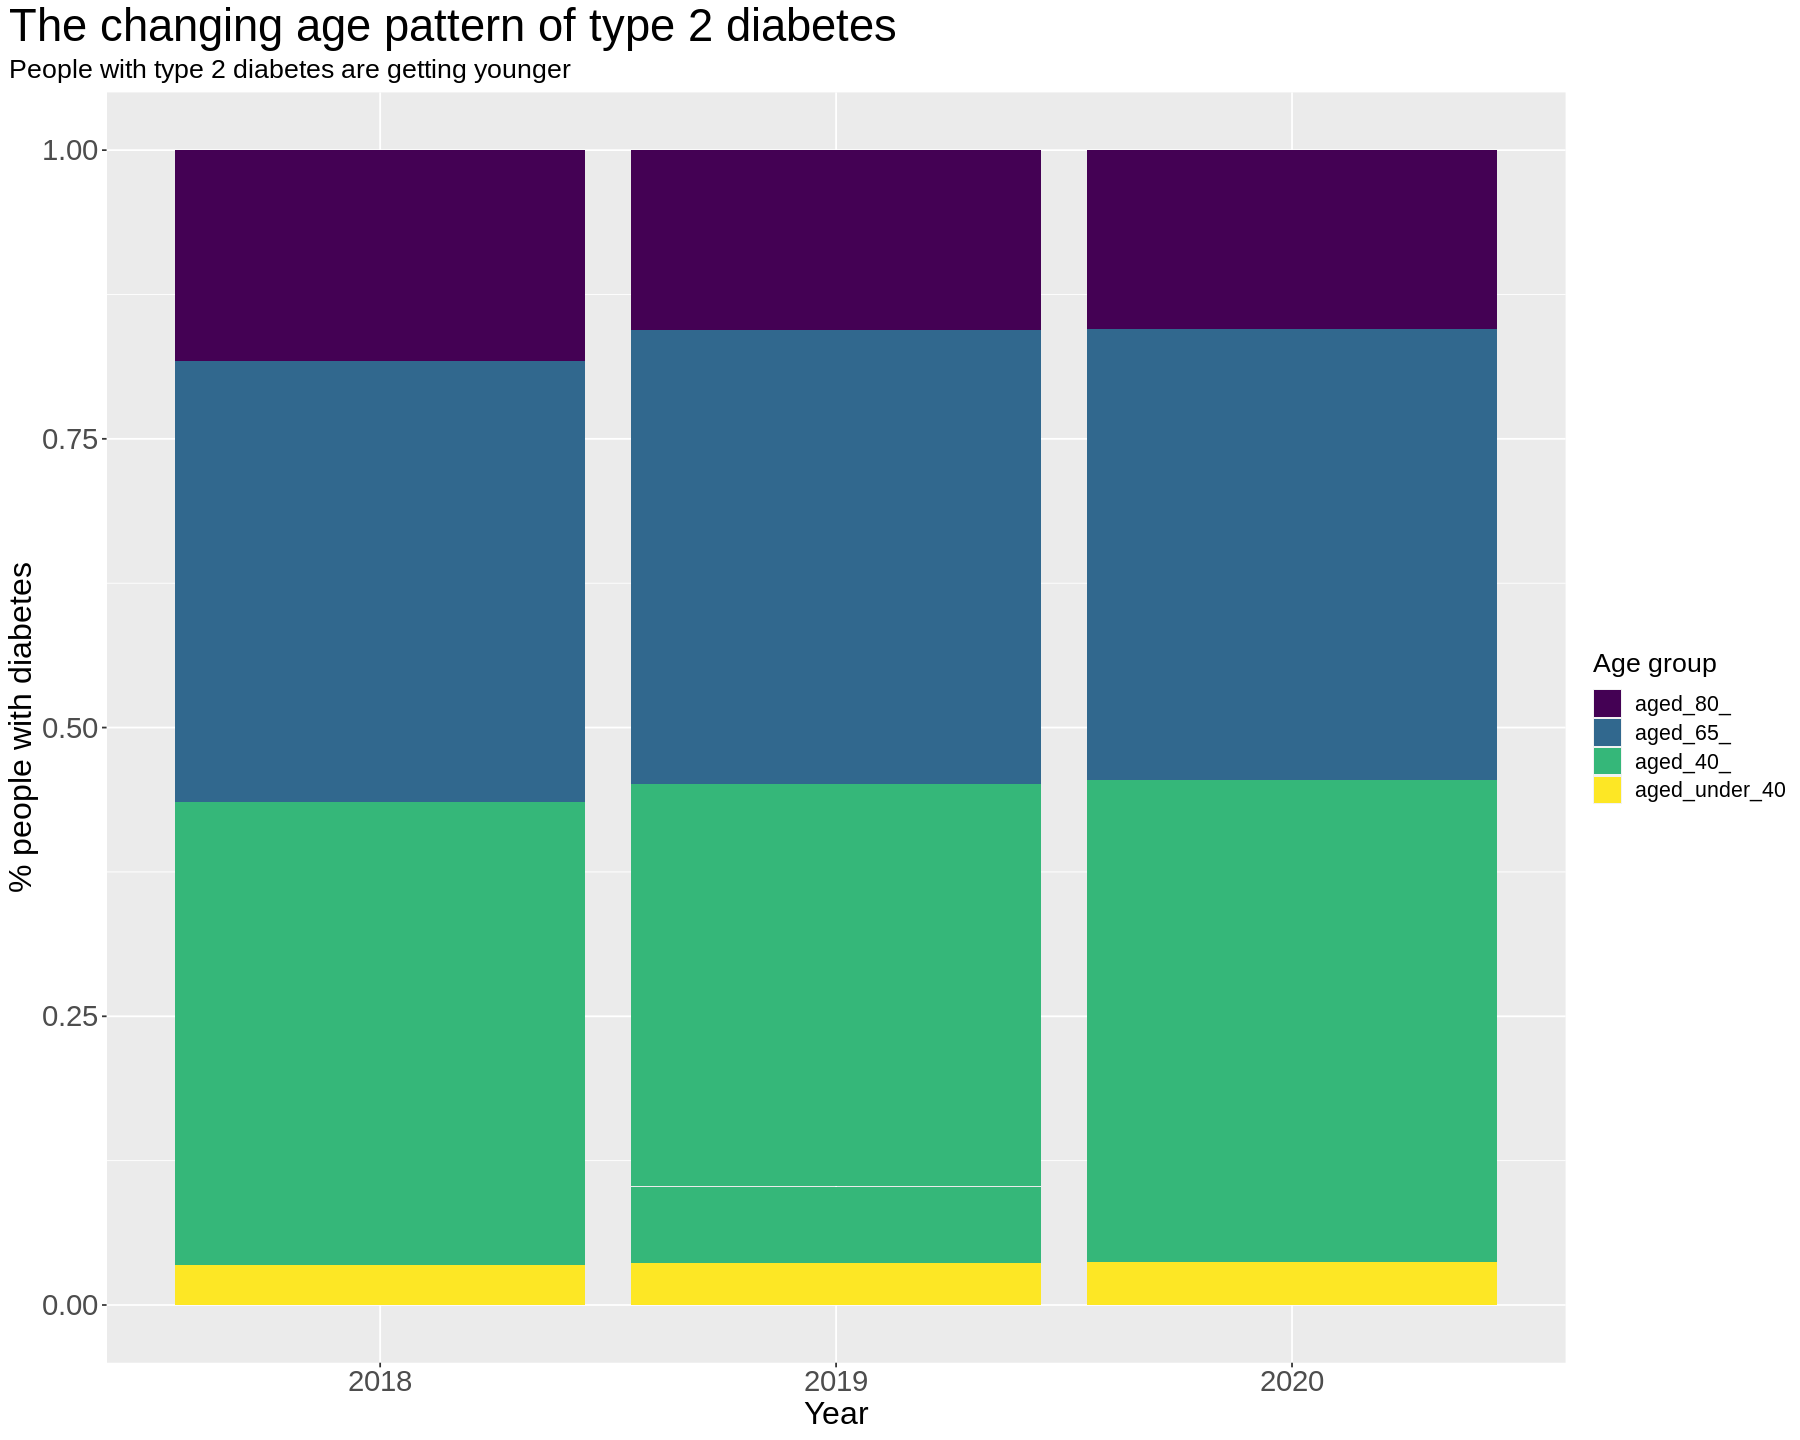

In [69]:
dm_age <- dmm |>
  select(contains("aged")) |>
  pivot_longer(names_to = "vars", values_to = "vals", cols = 1:last_col()) |>
  mutate(year = str_extract(vars, "20\\d{2}"),
         dm_type = str_extract(vars, "type_\\d{1}"),
         age = str_extract(vars, "aged.*\\d{2}_"))

# Set options in Jupyter to control plot width and height
options(repr.plot.width = 15, repr.plot.height = 12)

base_size <- 16

p <- dm_age |>
  mutate(age1 = str_extract(age, "aged_\\d{2}_|aged_under_40"),
         age1 = fct_relevel(age1, "aged_under_40", "aged_40_", "aged_65_", "aged_80_" )) |>
  ggplot() +
  geom_col(aes(year, vals, fill = fct_rev(age1)), position = "fill") +
  labs(y = "% people with diabetes",
       x = "Year",
       title = "The changing age pattern of type 2 diabetes",
       subtitle = "People with type 2 diabetes are getting younger") +
  scale_fill_viridis_d(name = "Age group") +
  theme(plot.title.position = "plot")  + theme(
  text = element_text(size = base_size),  # Sets a global size for text elements
  plot.title = element_text(size = base_size * 1.7),
  axis.title = element_text(size = base_size * 1.2),
  axis.text = element_text(size = base_size * 1.1),
  plot.caption = element_text(size = base_size * 0.8)
)

p